# Classification after Clustering with Agglomerative Clustering

### Import CSV and Required Packages

In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay



warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)

# Create Dataframe

df = pd.read_csv("./clustered_data/clustered_data.csv")

# Print shape of dataset
print(df.shape)

(1000, 10)


In [376]:
df.head()

,coin,symbol,price,mkt_cap,date,one_hour,twentyfour_hour,seven_day,twentyfour_hour_volume,cluster
0,Bitcoin,BTC,40859.460000,7.709915e+11,2022-03-16,0.022,0.030,0.055,3.539076e+10,0
1,Ethereum,ETH,2744.410000,3.271044e+11,2022-03-16,0.024,0.034,0.065,1.974870e+10,0
2,Tether,USDT,1.000000,7.996516e+10,2022-03-16,-0.001,-0.001,0.000,5.793497e+10,0
3,BNB,BNB,383.430000,6.404382e+10,2022-03-16,0.018,0.028,0.004,1.395854e+09,0
4,USD Coin,USDC,0.999874,5.222214e+10,2022-03-16,-0.001,0.000,-0.000,3.872274e+09,0


In [378]:
df

,coin,symbol,price,mkt_cap,date,one_hour,twentyfour_hour,seven_day,twentyfour_hour_volume,cluster
0,Bitcoin,BTC,40859.460000,7.709915e+11,2022-03-16,0.022,0.030,0.055,3.539076e+10,0
1,Ethereum,ETH,2744.410000,3.271044e+11,2022-03-16,0.024,0.034,0.065,1.974870e+10,0
2,Tether,USDT,1.000000,7.996516e+10,2022-03-16,-0.001,-0.001,0.000,5.793497e+10,0
3,BNB,BNB,383.430000,6.404382e+10,2022-03-16,0.018,0.028,0.004,1.395854e+09,0
4,USD Coin,USDC,0.999874,5.222214e+10,2022-03-16,-0.001,0.000,-0.000,3.872274e+09,0
...,...,...,...,...,...,...,...,...,...,...
995,IRISnet,IRIS,0.055426,6.809024e+07,2022-03-17,0.016,-0.003,-0.088,2.976839e+06,0
996,Circuits of Value,COVAL,0.037961,6.782627e+07,2022-03-17,0.002,-0.012,-0.054,3.667870e+05,0
997,ARPA Chain,ARPA,0.069003,6.776284e+07,2022-03-17,-0.000,0.008,-0.037,1.363376e+07,0
998,SuperRare,RARE,0.464613,6.738822e+07,2022-03-17,-0.003,0.014,0.019,9.398219e+06,0


**Split X and y**
- Why do we split our data?
> Training Dataset is the part of Original Dataset that we use to train our ML model. The model learns on this data by running the algorithm and maps a function F(x) where “x” in the independent variable (inputs) for “y” where “y” is the dependent variable(output).

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   coin                    1000 non-null   object 
 1   symbol                  1000 non-null   object 
 2   price                   1000 non-null   float64
 3   mkt_cap                 1000 non-null   float64
 4   date                    1000 non-null   object 
 5   one_hour                1000 non-null   float64
 6   twentyfour_hour         1000 non-null   float64
 7   seven_day               1000 non-null   float64
 8   twentyfour_hour_volume  1000 non-null   float64
 9   cluster                 1000 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 78.3+ KB


## Prepare X and y cleanly

In [380]:
X = df.drop("cluster", axis=1) #dropping the target column which is 'cluster'
y = df["cluster"]

### LabelEncoder symbol
- Simple because likely each row corresponds to a coin — and since this is just for model input (not for human interpretation), label Encoder

In [381]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

In [392]:
X

,coin,symbol,price,mkt_cap,one_hour,twentyfour_hour,seven_day,twentyfour_hour_volume
0,67,68,40859.460000,7.709915e+11,0.022,0.030,0.055,3.539076e+10
1,148,150,2744.410000,3.271044e+11,0.024,0.034,0.065,1.974870e+10
2,417,445,1.000000,7.996516e+10,-0.001,-0.001,0.000,5.793497e+10
3,45,62,383.430000,6.404382e+10,0.018,0.028,0.004,1.395854e+09
4,439,442,0.999874,5.222214e+10,-0.001,0.000,-0.000,3.872274e+09
...,...,...,...,...,...,...,...,...
995,205,219,0.055426,6.809024e+07,0.016,-0.003,-0.088,2.976839e+06
996,93,97,0.037961,6.782627e+07,0.002,-0.012,-0.054,3.667870e+05
997,5,31,0.069003,6.776284e+07,-0.000,0.008,-0.037,1.363376e+07
998,401,345,0.464613,6.738822e+07,-0.003,0.014,0.019,9.398219e+06


## Grid Search

- Why do we use Grid Search?

`GridSearchCV` is a technique to search through the best parameter values from the given set of the grid of parameters. It is basically a cross-validation method. the model and the parameters are required to be fed in. Best parameter values are extracted and then the predictions are made.

## Select the best model
- so here we have some list of the best classification algorithms we imported. Now we will compare each model's score and see which model is performing better than rest of the others

In [382]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics 

models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

- ### We will create a generic function to check each model's performance so that we can compare those

In [383]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    

    models_list = []
    scores = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_pred = model.predict(X_test)

        score = accuracy_score(y_test,y_pred)
        
        model_name = list(models.keys())[i]
        print(f'---- score for --- {model_name} ----')
        print(f"{score}")
        models_list.append(model_name)
        scores.append(score)
    
    print()
    
    report = pd.DataFrame()
    report['Model_name'] = models_list
    report['Score'] = scores        
    return report

### Let's check the report

In [384]:
report = evaluate_models(X, y, models)

---- score for --- Random Forest ----
0.97
---- score for --- Decision Tree ----
0.965
---- score for --- Gradient Boosting ----
0.965
---- score for --- Logistic Regression ----
0.92
---- score for --- K-Neighbors Classifier ----
0.915
---- score for --- XGBClassifier ----
0.975
---- score for --- CatBoosting Classifier ----
0.975
---- score for --- AdaBoost Classifier ----
0.96



In [385]:
report.sort_values('Score')                                                                                        

,Model_name,Score
4,K-Neighbors Classifier,0.915
3,Logistic Regression,0.920
7,AdaBoost Classifier,0.960
1,Decision Tree,0.965
2,Gradient Boosting,0.965
0,Random Forest,0.970
5,XGBClassifier,0.975
6,CatBoosting Classifier,0.975


- ### From the report above we can see that the XGBClassifier model performed the best, so we will continue training our model using XGBClassifier algorithm.


### Let's do hyperparameter tuning
- **And what's it actually?**

In [386]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Drop the target column and the date column
X = df.drop(["cluster", "date"], axis=1)
y = df["cluster"]

# Convert object columns ('coin', 'symbol') to numerical values using LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns if any
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Define the XGBClassifier model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3)

# Fit the grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Test set performance
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy with best parameters: ", test_accuracy)



Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best cross-validation score:  0.9787483690499658
Test set accuracy with best parameters:  0.965


### So we got our best parameters. Let's now train the model with those parameters.

In [387]:
best_xgb_model = XGBClassifier(
    n_estimators = 200 ,
    max_depth = 3 ,
    learning_rate = 0.1
)

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   coin                    1000 non-null   object 
 1   symbol                  1000 non-null   object 
 2   price                   1000 non-null   float64
 3   mkt_cap                 1000 non-null   float64
 4   date                    1000 non-null   object 
 5   one_hour                1000 non-null   float64
 6   twentyfour_hour         1000 non-null   float64
 7   seven_day               1000 non-null   float64
 8   twentyfour_hour_volume  1000 non-null   float64
 9   cluster                 1000 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 78.3+ KB


In [389]:
from sklearn.metrics import classification_report, confusion_matrix

best_xgb_model = best_xgb_model.fit(X_train,y_train)
# Predict on test set
y_pred = best_xgb_model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       185
           1       0.83      0.67      0.74        15

    accuracy                           0.96       200
   macro avg       0.90      0.83      0.86       200
weighted avg       0.96      0.96      0.96       200

[[183   2]
 [  5  10]]


### Create a Pickle file usin serialization 

In [390]:
import pickle
pickle_out = open("best_xgb_model.pkl" , "wb")
pickle.dump(best_xgb_model , pickle_out)
pickle_out.close()

## Confusion matrix of the model
- **What is confusion matrix ?**
> The confusion matrix is a matrix used to determine the performance of the classification models for a given set of test data. It can only be determined if the true values for test data are known. The matrix itself can be easily understood, but the related terminologies may be confusing.

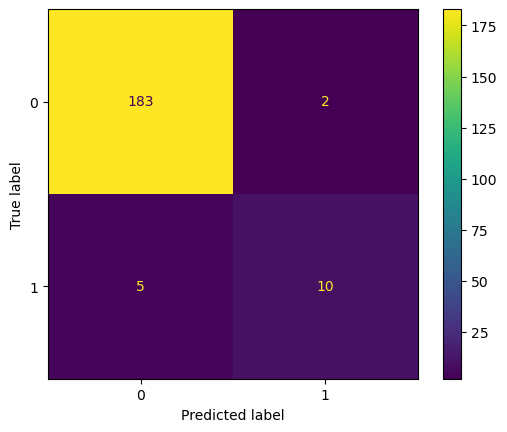

In [391]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

- **Reports**

**We can see, that the model performed pretty well.**
- we have used XGBClassifier as it performed well than other models
- We got a good accuracy while predicting the test dataset.